Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import random
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.datasets import make_classification, make_blobs, make_gaussian_quantiles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

Q1_Create 1000 points in 4 classes with 3 features

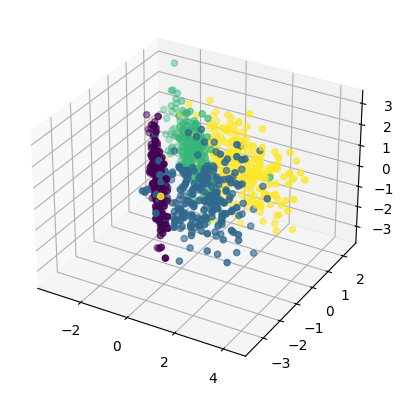

In [2]:
X,y = make_classification(n_samples=1000, n_features=3, n_classes=4, n_redundant=0,
                          random_state=14, n_clusters_per_class=1, class_sep=1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)


Q1_Split train and test data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=14)

Q1_Training Logistic_Regression

In [4]:
logistic_regression_model = LogisticRegression(max_iter=50, random_state=14)
logistic_regression_model.fit(X=X_train, y=y_train)


LogisticRegression(max_iter=50, random_state=14)

Q1_Classification with Logistic_Regression

In [5]:
y_hat = logistic_regression_model.predict(X_test)
y_hat_prob = logistic_regression_model.predict_proba(X_test)
accuracy = logistic_regression_model.score(X_test, y_test)
print('accuracy :', accuracy*100, '%')

accuracy : 89.0 %


In [ ]:
# x1_min, x2_min, x3_min = np.min(X, axis=0)
# x1_max, x2_max, x3_max = np.max(X, axis=0)
# print(x1_min, x2_min, x3_min)
# print(x1_max, x2_max, x3_max)
# n_of_points = 400
# x1r = np.linspace(x1_min, x1_max, n_of_points)
# x2r = np.linspace(x2_min, x2_max, n_of_points)
# x3r = np.linspace(x3_min, x3_max, n_of_points)

# x1m, x2m, x3m = np.meshgrid(x1r.flatten(), x2r.flatten(), x3r.flatten())

# xm = np.stack((x1m.flatten(), x2m.flatten(), x3m.flatten()), axis=1)
# ym = logestic_regression_model.decision_function(xm)

# plt.contour(x1m, x2m, x3m, ym.reshape(x1m))
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

-3.327085858603798 -3.58277087318234 -3.3711999935157833
4.335702252277571 2.412441111655127 3.138193132387343


KeyboardInterrupt: 

Q2_Downloading CWRU Bearing dataset

In [6]:
#!pip install --upgrade --no-cashe-dir gdown
#Fault data
!gdown 1KikXNbnJT75cTAps2r1kpPP7rsf1S4hX
bearing_fault_dataset = sio.loadmat('BearingData_fault.mat')
#Normal data
!gdown 1TkzbSJdtXipeYcwF6BoD9Ve4504UOq6W
bearing_normal_dataset = sio.loadmat('BearingData_Normal.mat')

Downloading...
From (original): https://drive.google.com/uc?id=1KikXNbnJT75cTAps2r1kpPP7rsf1S4hX
From (redirected): https://drive.google.com/uc?id=1KikXNbnJT75cTAps2r1kpPP7rsf1S4hX&confirm=t&uuid=3d70e088-43ae-4311-8df8-72eaaade2cdd
To: /content/BearingData_fault.mat
100% 2.95M/2.95M [00:00<00:00, 85.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1TkzbSJdtXipeYcwF6BoD9Ve4504UOq6W
From (redirected): https://drive.google.com/uc?id=1TkzbSJdtXipeYcwF6BoD9Ve4504UOq6W&confirm=t&uuid=376afd27-0954-462a-8586-6c6aedcb460f
To: /content/BearingData_Normal.mat
100% 15.5M/15.5M [00:00<00:00, 49.8MB/s]


Q2_Display dataset keys

In [7]:
print(bearing_normal_dataset.keys())
print(bearing_fault_dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'ans', 'X098_DE_time', 'X098_FE_time', 'X099_DE_time', 'X099_FE_time'])
dict_keys(['__header__', '__version__', '__globals__', 'X108_DE_time', 'X108_FE_time', 'X108_BA_time', 'X108RPM'])


Q2_Reshape dataset

In [8]:
M = 500
N = 200
x1_normal = np.reshape(bearing_normal_dataset['X098_DE_time'][0:M*N], (M,N))
x2_normal = np.reshape(bearing_normal_dataset['X098_FE_time'][0:M*N], (M,N))
x1_fault = np.reshape(bearing_fault_dataset['X108_DE_time'][0:M*N], (M,N))
x2_fault = np.reshape(bearing_fault_dataset['X108_FE_time'][0:M*N], (M,N))

Q2_Feature extraction function

In [57]:
def feature_extract(x1,x2,ep):
  x1_n = np.expand_dims(x1, axis=2)
  x2_n = np.expand_dims(x2, axis=2)
  xc = np.concatenate((x1_n,x2_n), axis=2)
  xc_mean = np.mean(xc, axis=2)
  m = np.expand_dims(xc_mean, axis=2)
  m = np.concatenate((m,m), axis=2)

  feature = {'x1': x1,'x2': x2}
  feature['std']  = np.std(xc, axis=2)
  feature['p']    = np.amax(np.abs(xc), axis=2)
  temp = np.std(xc, axis=2)**3
  temp[temp == 0] = ep
  feature['ske']  = np.mean((xc-m)**3, axis=2) / temp
  temp = np.std(xc, axis=2)**4
  temp[temp == 0] = ep
  feature['kur']  = np.mean((xc-m)**4, axis=2) / temp
  feature['rms']  = np.sqrt(np.mean(xc**2, axis=2))
  temp = np.sqrt(np.mean(xc**2, axis=2))
  temp[temp == 0] = ep
  feature['cf']   = np.amax(np.abs(xc), axis=2) / temp
  feature['smr']  = np.mean(np.sqrt(np.abs(xc)), axis=2) ** 2
  temp = np.mean(np.sqrt(np.abs(xc)), axis=2) ** 2
  temp[temp == 0] = ep
  feature['clf']  = np.amax(np.abs(xc), axis=2) / temp
  temp = np.mean(np.abs(xc), axis=2)
  temp[temp == 0] = ep
  feature['sf']   = np.sqrt(np.mean(xc**2, axis=2)) / temp
  temp = np.mean(np.abs(xc), axis=2)
  temp[temp == 0] = ep
  feature['if1']  = np.amax(np.abs(xc), axis=2) / temp
  feature['if2']  = np.max(np.abs(xc), axis=2) / temp
  return feature


Q2_Feature extraction

In [58]:
x_normal = feature_extract(x1_normal, x2_normal,1e-10)
x_fault = feature_extract(x1_fault, x2_fault,1e-10)

Q2_Normal and fault data concatenation

In [59]:
X = {'x1': np.concatenate((x_normal['x1'], x_fault['x1']), axis=0),
     'x2': np.concatenate((x_normal['x2'], x_fault['x2']), axis=0),
     'std': np.concatenate((x_normal['std'], x_fault['std']), axis=0),
     'p': np.concatenate((x_normal['p'], x_fault['p']), axis=0),
     'ske': np.concatenate((x_normal['ske'], x_fault['ske']), axis=0),
     'kur': np.concatenate((x_normal['kur'], x_fault['kur']), axis=0),
     'rms': np.concatenate((x_normal['rms'], x_fault['rms']), axis=0),
     'cf': np.concatenate((x_normal['cf'], x_fault['cf']), axis=0),
     'smr': np.concatenate((x_normal['smr'], x_fault['smr']), axis=0),
     'clf': np.concatenate((x_normal['clf'], x_fault['clf']), axis=0),
     'sf': np.concatenate((x_normal['sf'], x_fault['sf']), axis=0),
     'if1': np.concatenate((x_normal['if1'], x_fault['if1']), axis=0),
     'if2': np.concatenate((x_normal['if2'], x_fault['if2']), axis=0)}
y0 = np.zeros((M,N))#normal
y1 = np.ones((M,N))#fault
y = np.concatenate((y0,y1), axis=0)

Q2_Shuffling annd train and test split

In [83]:
data_shape = y.shape
for key,value in X.items():
  X[key] = X[key].flatten()
y = y.flatten()
np.random.seed(14)
perm = np.random.permutation(len(y))
for key,value in X.items():
  X[key] = X[key][perm]
y = y[perm]
for key,value in X.items():
  X[key] = X[key].reshape(data_shape)
y = y.reshape(data_shape)
#train and test split
train_size = 0.8
train_a = round(0.8*M)
X_train = {}
X_test = {}
for key, value in X.items():
  X_train[key] = X[key][0:train_a,:]
  X_test[key] = X[key][train_a:,:]
y_train = y[0:train_a,:]
y_test = y[train_a:,:]

Q2_Normalization

In [84]:
for key, value in X_train.items():
  X_train[key] =  (X_train[key] - np.min(X_train[key])) / (np.max(X_train[key]) - np.min(X_train[key]))
for key, value in X_test.items():
  X_test[key] =  (X_test[key] - np.min(X_test[key])) / (np.max(X_test[key]) - np.min(X_test[key]))

Q2_Sigmoid

In [86]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

Q2_Logistic_Regression

In [85]:
def logestic_regression(x,w):
  u = 0
  for key,value in x.items():
    u += x[key] * w[key]
  h_hat = sigmoid(u)
  return h_hat

$Loss=-[ylog(\hat{y})+(1-y)log(1-\hat{y})]$


In [87]:
def bce(y, y_hat):
  ep = 1e-10
  loss = -(np.mean(y*np.log(y_hat + ep) + (1-y)*np.log(1-y_hat + ep)))
  return loss

$\nabla L_w(w)=\frac{1}{n}X^T(\hat{y}-y)$

In [88]:
def gradient(x, y, y_hat):
  grd = {}
  for key, value in x.items():
    grd[key] = np.sum(np.multiply(x[key],(y_hat-y)))
  return grd

Gradient Descent

In [68]:
def gradient_decent(w, eta, grads):
  for key, value in w.items():
    w[key] -= eta * grads[key]
  return w

Q2_Accuracy

In [89]:
def accuracy(y, y_hat):
  acc = np.sum(y == np.round(y_hat)) / y.size
  return acc

Q2_Initial values

In [100]:
X_train['bias'] = np.ones(X_train['x1'].shape)
np.random.seed(14)
w_initial = np.random.rand(len(X)+1,1)
w = {'bias': w_initial[0,0], 'x1': w_initial[1,0], 'x2': w_initial[2,0], 'std': w_initial[3,0], 'p': w_initial[4,0], 'ske': w_initial[5,0], 'kur': w_initial[6,0], 'rms': w_initial[7,0], 'cf': w_initial[8,0], 'smr': w_initial[9,0], 'clf': w_initial[10,0], 'sf': w_initial[11,0], 'if1': w_initial[12,0], 'if2': w_initial[13,0]}
initial_eta = 0.00005
eta = initial_eta
n_epochs = 1000


Q2_train

In [101]:
error_hist = []
for epoch in range(n_epochs):
    # predictions
    y_hat = logestic_regression(X_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(X_train, y_train, y_hat)

    # gradient descent
    w = gradient_decent(w, eta, grads)
    acc = accuracy(y_train, y_hat)
    print(f'Epoch={epoch}, \t E={e}, \t accuracy={acc}')

Epoch=0, 	 E=1.6328529421622404, 	 accuracy=0.4993625
Epoch=1, 	 E=2.530189070902051, 	 accuracy=0.5006375
Epoch=2, 	 E=1.932413254447763, 	 accuracy=0.4993625
Epoch=3, 	 E=2.3102767803082433, 	 accuracy=0.5006375
Epoch=4, 	 E=2.0530193154177248, 	 accuracy=0.4993625
Epoch=5, 	 E=2.162597665209233, 	 accuracy=0.5006375
Epoch=6, 	 E=2.10749918157735, 	 accuracy=0.4993625
Epoch=7, 	 E=2.058995600536212, 	 accuracy=0.5006375
Epoch=8, 	 E=2.121813798263166, 	 accuracy=0.4993625
Epoch=9, 	 E=1.9864533968662064, 	 accuracy=0.5006375
Epoch=10, 	 E=2.1079868835428153, 	 accuracy=0.4993625
Epoch=11, 	 E=1.937192362858638, 	 accuracy=0.5006875
Epoch=12, 	 E=2.073224473569594, 	 accuracy=0.4993625
Epoch=13, 	 E=1.9057563809179718, 	 accuracy=0.501275
Epoch=14, 	 E=2.0228228435321207, 	 accuracy=0.4993625
Epoch=15, 	 E=1.8876235381722757, 	 accuracy=0.5029
Epoch=16, 	 E=1.961351832079849, 	 accuracy=0.4993625
Epoch=17, 	 E=1.87858845885191, 	 accuracy=0.50495
Epoch=18, 	 E=1.8929446893587318, 	 ac

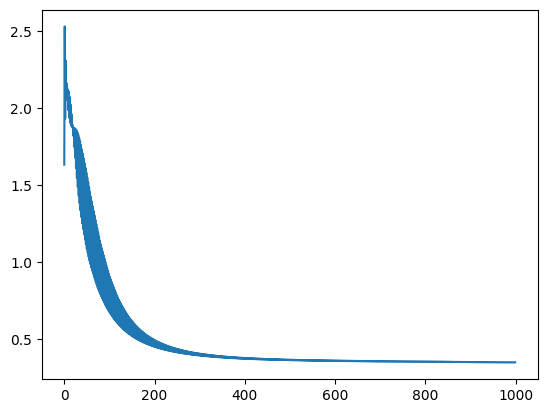

In [102]:
plt.plot(error_hist)

<BarContainer object of 14 artists>

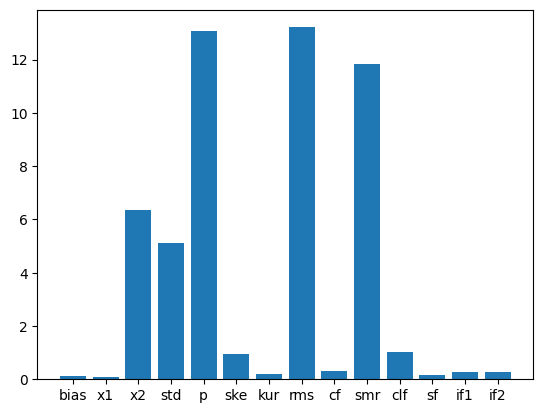

In [103]:
w_keys = list(w.keys())
w_values = list(w.values())
w_values = [abs(x) for x in w_values]
plt.bar(w_keys,w_values)

In [104]:
y_hat = logestic_regression(X_train, w)
print("accuracy: ",accuracy(y_train, y_hat))
y_hat = logestic_regression(X_test, w)
print("accuracy: ",accuracy(y_test, y_hat))

accuracy:  0.8471
accuracy:  0.8490083333333334


Q3_Dataset downloading

In [105]:
!gdown 1gWTHhsD52p_0ZjqIE89UHsjfISBltKuC
weatherHistory = pd.read_csv('weatherHistory.csv')

Downloading...
From: https://drive.google.com/uc?id=1gWTHhsD52p_0ZjqIE89UHsjfISBltKuC
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 109MB/s] 


Q3_Extract numeric data

In [108]:
weatherHistory = weatherHistory.dropna()
numeric_weather_df = weatherHistory.select_dtypes(include=['number'])
print(weatherHistory.keys())

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


Q3_Draw heatmap

<Axes: >

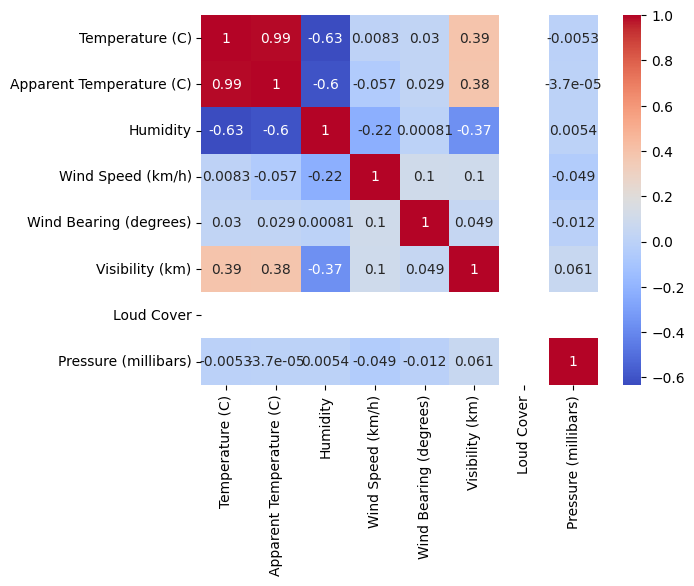

In [112]:
correlation = numeric_weather_df.corr()
sns.heatmap(correlation, annot = True, cmap='coolwarm')

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Loud Cover'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >]],
      dtype=object)

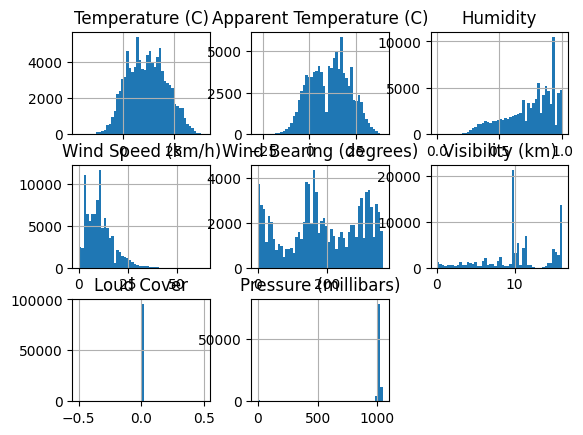

In [111]:
numeric_weather_df.hist(bins=50)
# plt.hist(numeric_weather_df, bins=5, edgecolor='black')